## Avaliando [Crash Course](https://mxnet.apache.org/versions/master/api/python/docs/tutorials/getting-started/crash-course/6-train-nn.html)


In [1]:
import time
import os
import sys
import zipfile

import mxnet as mx
from mxnet import np, npx, gluon, init, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import transforms

import matplotlib.pyplot as plt 
import numpy as np


module_path = os.path.abspath(os.path.join('../../../scripts/CrashCourse'))
if module_path not in sys.path:
    sys.path.append(module_path)

from prepare_dataset import process_dataset

mx.np.random.seed(42)

In [2]:

if not os.path.isdir('../../../data/crashCourse/c6/plants'):

    url='https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/hb74ynkjcn-1.zip'

    os.makedirs('../../../data/crashCourse/c6/',exist_ok=True)

    zip_file_path=mx.gluon.utils.download(url,path='../../../data/crashCourse/c6/')

    with zipfile.ZipFile(zip_file_path,'r') as zf:
        zf.extractall(path='../../../data/crashCourse/c6/plants')

    os.remove(zip_file_path)    

### Data inspection

In [3]:
process_dataset('../../../data/crashCourse/c6/plants',path='../../../data/crashCourse/c6')

In [4]:
train_dataset=gluon.data.vision.ImageFolderDataset('../../../data/crashCourse/c6/datasets/train')
val_dataset=gluon.data.vision.ImageFolderDataset('../../../data/crashCourse/c6/datasets/validation')
test_dataset=gluon.data.vision.ImageFolderDataset('../../../data/crashCourse/c6/datasets/test')

Data type: uint8
Label: 0
Label description: diseased
Image shape: (4000, 6000, 3)


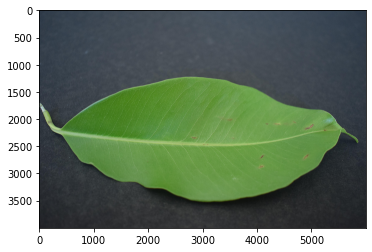

In [6]:
sample_idx=888
sample=train_dataset[sample_idx]
data=sample[0]
label=sample[1]

plt.imshow(data.asnumpy())
print(f"Data type: {data.dtype}")
print(f"Label: {label}")
print(f"Label description: {train_dataset.synsets[label]}")
print(f"Image shape: {data.shape}")